In [130]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL of the website you want to scrape
url = "https://www.screener.in/company/ASIANPAINT/consolidated/"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Parse the HTML content of the page using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find the "Balance Sheet" section
balance_sheet_section = soup.find("section", {"id": "balance-sheet"})

# Extract the table containing balance sheet data
balance_sheet_table = balance_sheet_section.find("table", class_="data-table")

# Extract the rows from the table
rows = balance_sheet_table.find_all("tr")

# Extract the header row and column names
header_row = rows[0]
column_names = [header.text.strip() for header in header_row.find_all("th")]

# Initialize an empty dictionary to store data
data_dict = {column: [] for column in column_names}

# Iterate through the rows and extract the data
for row in rows[1:]:
    cells = row.find_all("td")
    for i, cell in enumerate(cells):
        data_dict[column_names[i]].append(cell.text.strip())

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data_dict)

# Print the resulting DataFrame
print(df)


                       Mar 2012 Mar 2013 Mar 2014 Mar 2015 Mar 2016 Mar 2017  \
0      Share Capital +       96       96       96       96       96       96   
1             Reserves    2,653    3,288    3,943    4,646    6,429    7,508   
2         Borrowings +      341      251      249      418      323      560   
3  Other Liabilities +    2,623    3,149    3,787    3,754    3,711    4,241   
4    Total Liabilities    5,712    6,784    8,075    8,914   10,559   12,405   
5       Fixed Assets +    1,301    2,441    2,562    2,660    3,416    3,304   
6                 CWIP      617       59       72      196      107      258   
7          Investments      355      296    1,424    1,588    2,712    2,652   
8       Other Assets +    3,440    3,989    4,019    4,471    4,324    6,192   
9         Total Assets    5,712    6,784    8,075    8,914   10,559   12,405   

  Mar 2018 Mar 2019 Mar 2020 Mar 2021 Mar 2022 Mar 2023  
0       96       96       96       96       96       96  
1  

In [131]:
df

,,Mar 2012,Mar 2013,Mar 2014,Mar 2015,Mar 2016,Mar 2017,Mar 2018,Mar 2019,Mar 2020,Mar 2021,Mar 2022,Mar 2023
0,Share Capital +,96,96,96,96,96,96,96,96,96,96,96,96
1,Reserves,"2,653","3,288","3,943","4,646","6,429","7,508","8,314","9,375","10,034","12,710","13,716","15,896"
2,Borrowings +,341,251,249,418,323,560,533,"1,320","1,118","1,093","1,587","1,933"
3,Other Liabilities +,"2,623","3,149","3,787","3,754","3,711","4,241","4,820","5,459","4,889","6,456","7,560","7,854"
4,Total Liabilities,"5,712","6,784","8,075","8,914","10,559","12,405","13,763","16,249","16,138","20,355","22,958","25,779"
5,Fixed Assets +,"1,301","2,441","2,562","2,660","3,416","3,304","3,732","6,497","6,272","5,859","5,519","5,770"
6,CWIP,617,59,72,196,107,258,"1,405",210,140,183,426,"1,020"
7,Investments,355,296,"1,424","1,588","2,712","2,652","2,141","2,569","2,019","4,737","3,248","4,262"
8,Other Assets +,"3,440","3,989","4,019","4,471","4,324","6,192","6,485","6,974","7,707","9,577","13,765","14,728"
9,Total Assets,"5,712","6,784","8,075","8,914","10,559","12,405","13,763","16,249","16,138","20,355","22,958","25,779"


In [132]:
df.columns

Index(['', 'Mar 2012', 'Mar 2013', 'Mar 2014', 'Mar 2015', 'Mar 2016',
       'Mar 2017', 'Mar 2018', 'Mar 2019', 'Mar 2020', 'Mar 2021', 'Mar 2022',
       'Mar 2023'],
      dtype='object')

In [133]:
numeric_cols = df.columns[1:]
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.str.replace(',', '').astype(float), axis=1)
df

,,Mar 2012,Mar 2013,Mar 2014,Mar 2015,Mar 2016,Mar 2017,Mar 2018,Mar 2019,Mar 2020,Mar 2021,Mar 2022,Mar 2023
0,Share Capital +,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0
1,Reserves,2653.0,3288.0,3943.0,4646.0,6429.0,7508.0,8314.0,9375.0,10034.0,12710.0,13716.0,15896.0
2,Borrowings +,341.0,251.0,249.0,418.0,323.0,560.0,533.0,1320.0,1118.0,1093.0,1587.0,1933.0
3,Other Liabilities +,2623.0,3149.0,3787.0,3754.0,3711.0,4241.0,4820.0,5459.0,4889.0,6456.0,7560.0,7854.0
4,Total Liabilities,5712.0,6784.0,8075.0,8914.0,10559.0,12405.0,13763.0,16249.0,16138.0,20355.0,22958.0,25779.0
5,Fixed Assets +,1301.0,2441.0,2562.0,2660.0,3416.0,3304.0,3732.0,6497.0,6272.0,5859.0,5519.0,5770.0
6,CWIP,617.0,59.0,72.0,196.0,107.0,258.0,1405.0,210.0,140.0,183.0,426.0,1020.0
7,Investments,355.0,296.0,1424.0,1588.0,2712.0,2652.0,2141.0,2569.0,2019.0,4737.0,3248.0,4262.0
8,Other Assets +,3440.0,3989.0,4019.0,4471.0,4324.0,6192.0,6485.0,6974.0,7707.0,9577.0,13765.0,14728.0
9,Total Assets,5712.0,6784.0,8075.0,8914.0,10559.0,12405.0,13763.0,16249.0,16138.0,20355.0,22958.0,25779.0


In [134]:
# Remove plus signs from the first column
df[''] = df[''].str.replace('+', '')
df

C:\Users\Shantanu\AppData\Local\Temp\ipykernel_3448\1414629670.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[''] = df[''].str.replace('+', '')


,,Mar 2012,Mar 2013,Mar 2014,Mar 2015,Mar 2016,Mar 2017,Mar 2018,Mar 2019,Mar 2020,Mar 2021,Mar 2022,Mar 2023
0,Share Capital,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0
1,Reserves,2653.0,3288.0,3943.0,4646.0,6429.0,7508.0,8314.0,9375.0,10034.0,12710.0,13716.0,15896.0
2,Borrowings,341.0,251.0,249.0,418.0,323.0,560.0,533.0,1320.0,1118.0,1093.0,1587.0,1933.0
3,Other Liabilities,2623.0,3149.0,3787.0,3754.0,3711.0,4241.0,4820.0,5459.0,4889.0,6456.0,7560.0,7854.0
4,Total Liabilities,5712.0,6784.0,8075.0,8914.0,10559.0,12405.0,13763.0,16249.0,16138.0,20355.0,22958.0,25779.0
5,Fixed Assets,1301.0,2441.0,2562.0,2660.0,3416.0,3304.0,3732.0,6497.0,6272.0,5859.0,5519.0,5770.0
6,CWIP,617.0,59.0,72.0,196.0,107.0,258.0,1405.0,210.0,140.0,183.0,426.0,1020.0
7,Investments,355.0,296.0,1424.0,1588.0,2712.0,2652.0,2141.0,2569.0,2019.0,4737.0,3248.0,4262.0
8,Other Assets,3440.0,3989.0,4019.0,4471.0,4324.0,6192.0,6485.0,6974.0,7707.0,9577.0,13765.0,14728.0
9,Total Assets,5712.0,6784.0,8075.0,8914.0,10559.0,12405.0,13763.0,16249.0,16138.0,20355.0,22958.0,25779.0


In [135]:
df

,,Mar 2012,Mar 2013,Mar 2014,Mar 2015,Mar 2016,Mar 2017,Mar 2018,Mar 2019,Mar 2020,Mar 2021,Mar 2022,Mar 2023
0,Share Capital,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0
1,Reserves,2653.0,3288.0,3943.0,4646.0,6429.0,7508.0,8314.0,9375.0,10034.0,12710.0,13716.0,15896.0
2,Borrowings,341.0,251.0,249.0,418.0,323.0,560.0,533.0,1320.0,1118.0,1093.0,1587.0,1933.0
3,Other Liabilities,2623.0,3149.0,3787.0,3754.0,3711.0,4241.0,4820.0,5459.0,4889.0,6456.0,7560.0,7854.0
4,Total Liabilities,5712.0,6784.0,8075.0,8914.0,10559.0,12405.0,13763.0,16249.0,16138.0,20355.0,22958.0,25779.0
5,Fixed Assets,1301.0,2441.0,2562.0,2660.0,3416.0,3304.0,3732.0,6497.0,6272.0,5859.0,5519.0,5770.0
6,CWIP,617.0,59.0,72.0,196.0,107.0,258.0,1405.0,210.0,140.0,183.0,426.0,1020.0
7,Investments,355.0,296.0,1424.0,1588.0,2712.0,2652.0,2141.0,2569.0,2019.0,4737.0,3248.0,4262.0
8,Other Assets,3440.0,3989.0,4019.0,4471.0,4324.0,6192.0,6485.0,6974.0,7707.0,9577.0,13765.0,14728.0
9,Total Assets,5712.0,6784.0,8075.0,8914.0,10559.0,12405.0,13763.0,16249.0,16138.0,20355.0,22958.0,25779.0


In [136]:
# First, set the "Metric" column as the index
df.set_index('', inplace=True)

# Then, melt the DataFrame
df = df.transpose().reset_index()

# Rename the "index" column to "Year"
df.rename(columns={'index': 'Year'}, inplace=True)


In [137]:
df

,Year,Share Capital,Reserves,Borrowings,Other Liabilities,Total Liabilities,Fixed Assets,CWIP,Investments,Other Assets,Total Assets
0,Mar 2012,96.0,2653.0,341.0,2623.0,5712.0,1301.0,617.0,355.0,3440.0,5712.0
1,Mar 2013,96.0,3288.0,251.0,3149.0,6784.0,2441.0,59.0,296.0,3989.0,6784.0
2,Mar 2014,96.0,3943.0,249.0,3787.0,8075.0,2562.0,72.0,1424.0,4019.0,8075.0
3,Mar 2015,96.0,4646.0,418.0,3754.0,8914.0,2660.0,196.0,1588.0,4471.0,8914.0
4,Mar 2016,96.0,6429.0,323.0,3711.0,10559.0,3416.0,107.0,2712.0,4324.0,10559.0
5,Mar 2017,96.0,7508.0,560.0,4241.0,12405.0,3304.0,258.0,2652.0,6192.0,12405.0
6,Mar 2018,96.0,8314.0,533.0,4820.0,13763.0,3732.0,1405.0,2141.0,6485.0,13763.0
7,Mar 2019,96.0,9375.0,1320.0,5459.0,16249.0,6497.0,210.0,2569.0,6974.0,16249.0
8,Mar 2020,96.0,10034.0,1118.0,4889.0,16138.0,6272.0,140.0,2019.0,7707.0,16138.0
9,Mar 2021,96.0,12710.0,1093.0,6456.0,20355.0,5859.0,183.0,4737.0,9577.0,20355.0


In [138]:
df.describe()

,Share Capital,Reserves,Borrowings,Other Liabilities,Total Liabilities,Fixed Assets,CWIP,Investments,Other Assets,Total Assets
count,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,96.0,8209.333333,810.500000,4858.583333,13974.250000,4111.083333,391.083333,2333.583333,7139.250000,13974.250000
std,0.0,4306.613589,578.173692,1683.397185,6502.957469,1774.078068,422.494639,1355.701593,3783.900876,6502.957469
min,96.0,2653.000000,249.000000,2623.000000,5712.000000,1301.000000,59.000000,296.000000,3440.000000,5712.000000
25%,96.0,4470.250000,336.500000,3743.250000,8704.250000,2635.500000,131.750000,1547.000000,4247.750000,8704.250000
50%,96.0,7911.000000,546.500000,4530.500000,13084.000000,3574.000000,203.000000,2355.000000,6338.500000,13084.000000
75%,96.0,10703.000000,1168.500000,5708.250000,17275.500000,5792.250000,473.750000,2846.000000,8174.500000,17275.500000
max,96.0,15896.000000,1933.000000,7854.000000,25779.000000,6497.000000,1405.000000,4737.000000,14728.000000,25779.000000


-This the statistical description of the data.

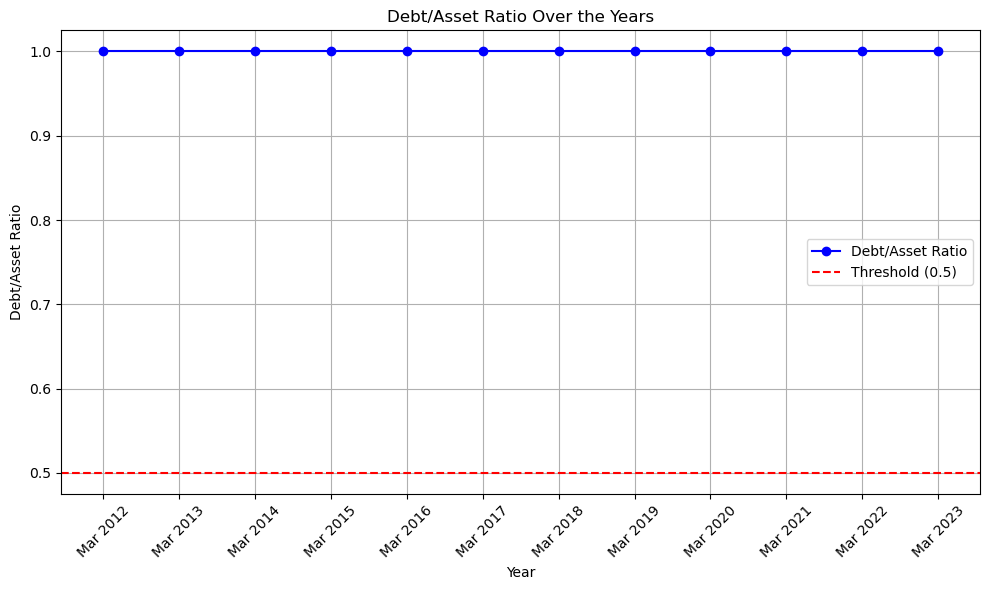

In [139]:

# Calculate the debt-to-asset ratio for each year
df["Debt/Asset Ratio"] = df["Total Liabilities"] / df["Total Assets"]

# Plot the debt-to-asset ratio over the years
plt.figure(figsize=(10, 6))
plt.plot(df["Year"], df["Debt/Asset Ratio"], marker='o', linestyle='-', color='b', label='Debt/Asset Ratio')
plt.axhline(y=0.5, color='r', linestyle='--', label='Threshold (0.5)')
plt.xlabel("Year")
plt.ylabel("Debt/Asset Ratio")
plt.title("Debt/Asset Ratio Over the Years")
plt.legend()
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This indicates the balance sheet is tallied correctly as Assets = Liabilities + Equity

In [140]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Calculate Equity Ratio
df['Equity Ratio'] = (df['Share Capital'] + df['Reserves']) / df['Total Assets']


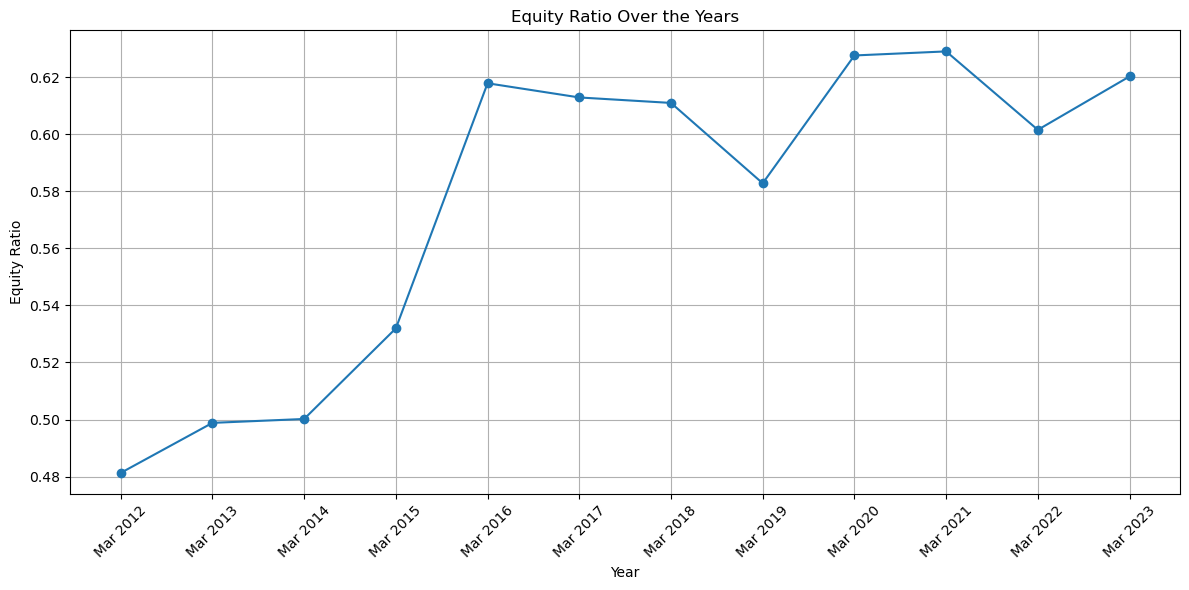

In [141]:

# Plot Equity Ratio for each year
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Equity Ratio'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Equity Ratio')
plt.title('Equity Ratio Over the Years')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

-The equity ratio is a financial metric that measures how much of a company's assets are financed by the owners' capital.

-A value of 0.6 means that shareholders' equity represents 60% of the company's total assets. In other words, for every dollar of assets the company holds, 60 cents are contributed by the shareholders, and the remaining 40 cents may be financed through debt or other liabilities.

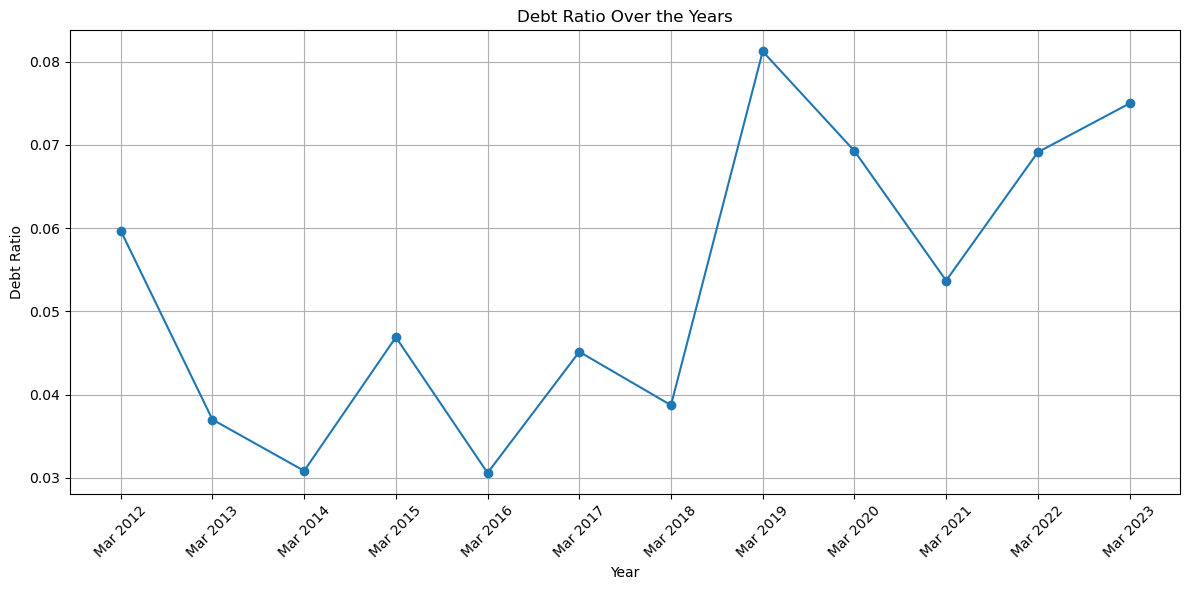

In [142]:

# Calculate Debt Ratio
df['Debt Ratio'] = df['Borrowings'] / df['Total Assets']

# Plot Debt Ratio for each year
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Debt Ratio'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Debt Ratio')
plt.title('Debt Ratio Over the Years')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

-The debt ratio determines the relative proportion of debt to total assets; it measures the proportion of debt used to finance the company’s assets. One can evaluate leverage in a firm with the help of this ratio.

-This ratio is being used by Top Management (to take decisions) as well as Investors (before making investment).

-0.50 is considered as an Ideal Debt Ratio. It depends on Capital Requirement and Level of Cash Flow.

-Higher the ratio implies more levered company and it shows that the company has more financial risk.

-Here we observe after 2019 it has more financial risk as asian paints have borrowed a lot.

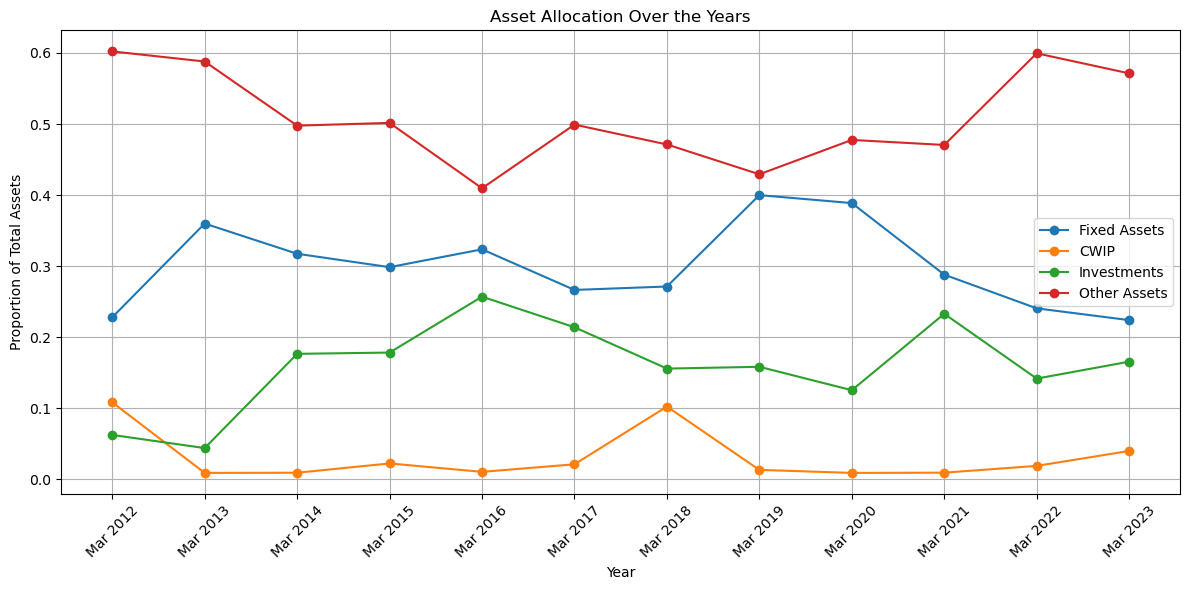

In [143]:
# Calculate the proportion of each asset category relative to total assets for each year
asset_categories = ["Fixed Assets", "CWIP", "Investments", "Other Assets"]
for category in asset_categories:
    df[f'{category} Proportion'] = df[category] / df['Total Assets']

# Plot the allocation of each asset category over time
plt.figure(figsize=(12, 6))
for category in asset_categories:
    plt.plot(df['Year'], df[f'{category} Proportion'], marker='o', linestyle='-', label=category)

plt.xlabel('Year')
plt.ylabel('Proportion of Total Assets')
plt.title('Asset Allocation Over the Years')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

-The numbers on the y-axis indicate the values of the asset allocation ratio for each year. This ratio reflects how the company has allocated its assets among these categories.

-The y-axis values show the asset allocation proportions for each category, allowing you to analyze how the company has distributed its resources over time.

-This graph indicates that more assets are allocated to other assets which consists of Inventories,Trade receivables,Cash Equivalents,Other asset items,

-Roughly half are allocated to other assets over the last 10 years

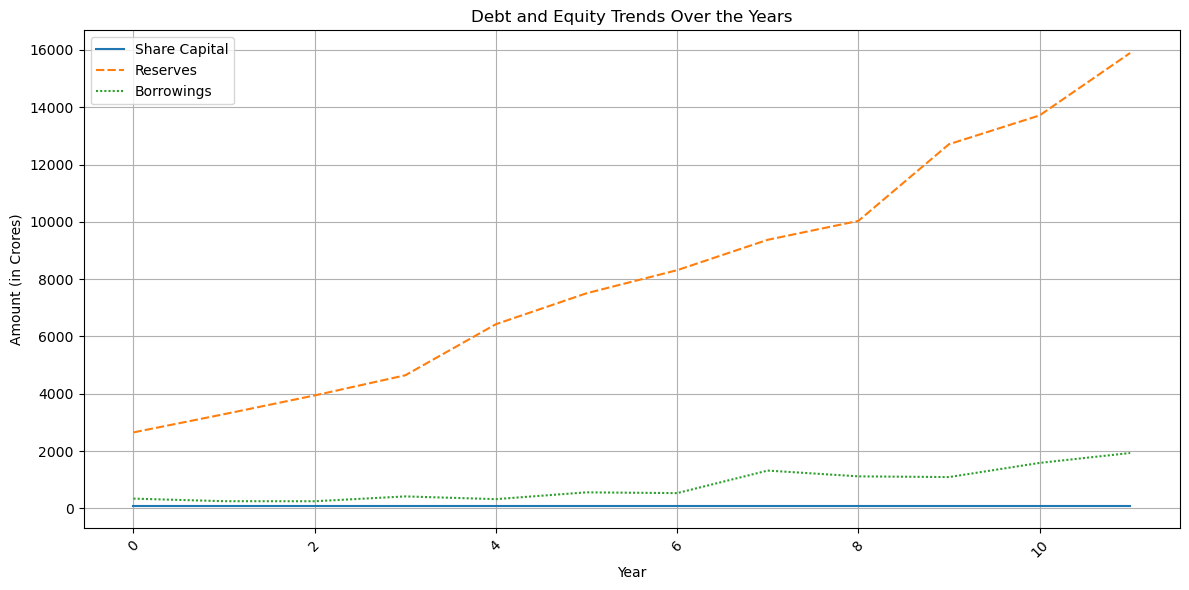

In [144]:

# Select the columns you want to plot
columns_to_plot = ['Share Capital', 'Reserves', 'Borrowings']

# Plot the trends using line plots
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[columns_to_plot])
plt.title('Debt and Equity Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Amount (in Crores)')  # You may need to adjust the unit based on your data
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

-Reserves over the years have grown from 2653 CR in 2012 to 15896 CR and they have consistently grown over the last 10 years.

-Borrowings have grown from 341 CR in 2012 to 1933 CR in 2023, only from 2019 the they have borrowed lot more as we observe borrowings jumped from  533 CR in 2018 to 1320 CR in 2019 which is a 147.6% increase

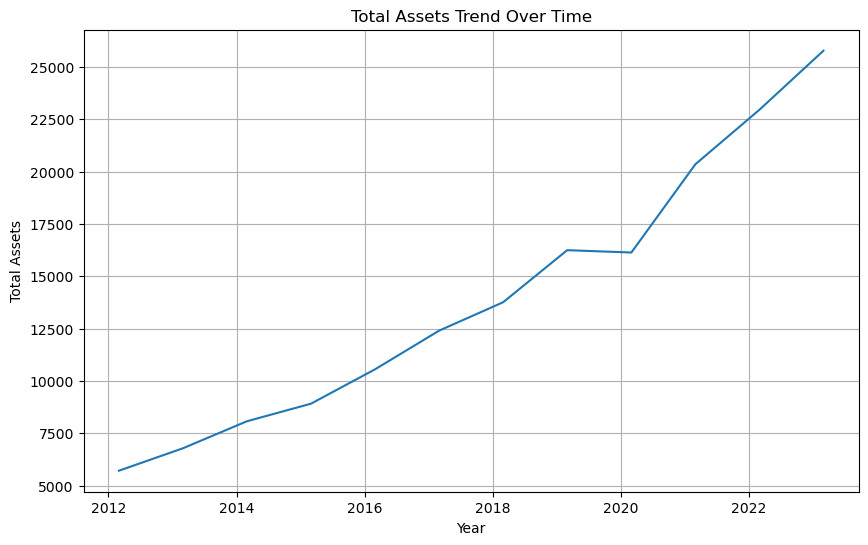

In [145]:
# Convert the 'Year' column to datetime with the correct format
df['Year'] = pd.to_datetime(df['Year'], format='%b %Y')

# Plot the 'Total Assets' trend over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Total Assets')
plt.title('Total Assets Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Total Assets')
plt.grid(True)
plt.show()


-From this graph we observe that assets went from 5712 Cr in 2012 to 25779 CR in 2023.

-Equity issuance and growth in retained earnings both lead to an increase in the book equity of a firm and, as a result, to an increase in total assets.

-So this does indicate the company is growing at a healthy rate.


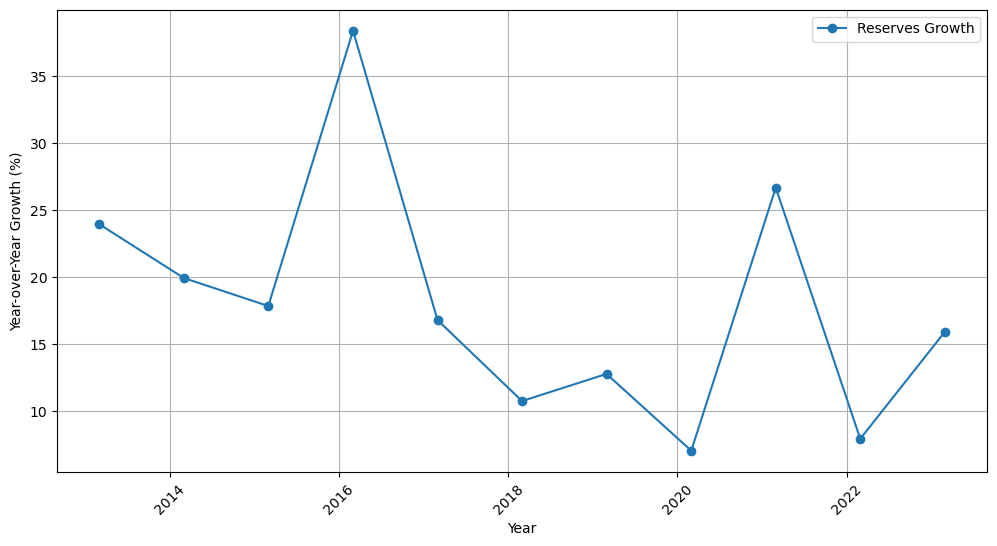

In [146]:


# Calculate year-over-year growth for Reserves
df['Reserves Growth'] = df['Reserves'].pct_change() * 100

# Plot the growth rates
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Reserves Growth'], label='Reserves Growth', marker='o')
plt.xlabel('Year')
plt.ylabel('Year-over-Year Growth (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()










This is the plot the year-over-year growth rates of Reserves over the years

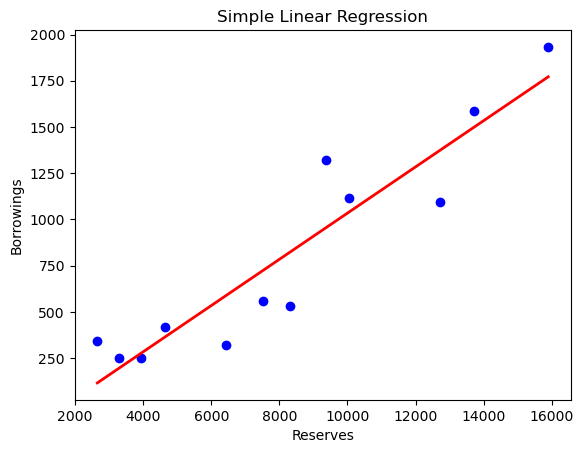

Intercept (b0): -215.64715762829042
Slope (b1): 0.12499762355387653


In [147]:
# Extract the independent variable (X1) and dependent variable (y1)
X1 = df["Reserves"].values.reshape(-1, 1)
y1 = df["Borrowings"].values

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X1, y1)

# Make predictions
y_pred = model.predict(X1)

# Plot the original data points and the regression line
plt.scatter(X1, y1, color='blue')
plt.plot(X1, y_pred, color='red', linewidth=2)
plt.xlabel("Reserves")
plt.ylabel("Borrowings")
plt.title("Simple Linear Regression")
plt.show()

# Print the coefficients of the regression equation
print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_[0])

-Reserves are like savings accounts – an accumulation of funds for a future purpose. The source of funding for a reserve might be surpluses from operations, or scheduled transfers that have been planned and budgeted.

-Having significant cash reserves gives an individual, group of individuals, or company the ability to make a large purchase immediately. It should also ensure they are able to cover themselves when they go through a rough patch financially and need to make sudden, unexpected payments.

-By performing simple linear regression we observe that as asian paints borrows more, they earn more revenue as they are using the borrowed money well and as a result they are able to save more money in reserves for a rainy day.

-We also observe that there is correlation between Borrowings and Reserves.

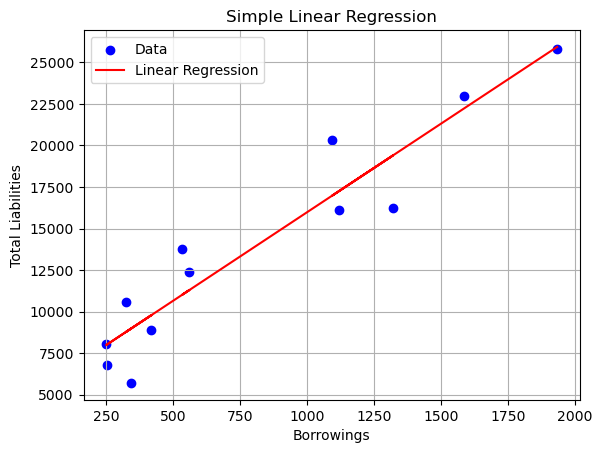

In [148]:
# Extract the independent variable (Borrowings) and dependent variable (Total Liabilities)
X = df[['Borrowings']]
y = df['Total Liabilities']

# Create and fit a Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions based on the model
y_pred = model.predict(X)

# Plot the data points
plt.scatter(X, y, label='Data', color='blue')

# Plot the regression line
plt.plot(X, y_pred, label='Linear Regression', color='red')

plt.title('Simple Linear Regression')
plt.xlabel('Borrowings')
plt.ylabel('Total Liabilities')
plt.legend()
plt.grid(True)
plt.show()

-This shows that there is correlation between Total Liabilites and borrowings as borrowings is part of Total liabilites hence this makes sense.

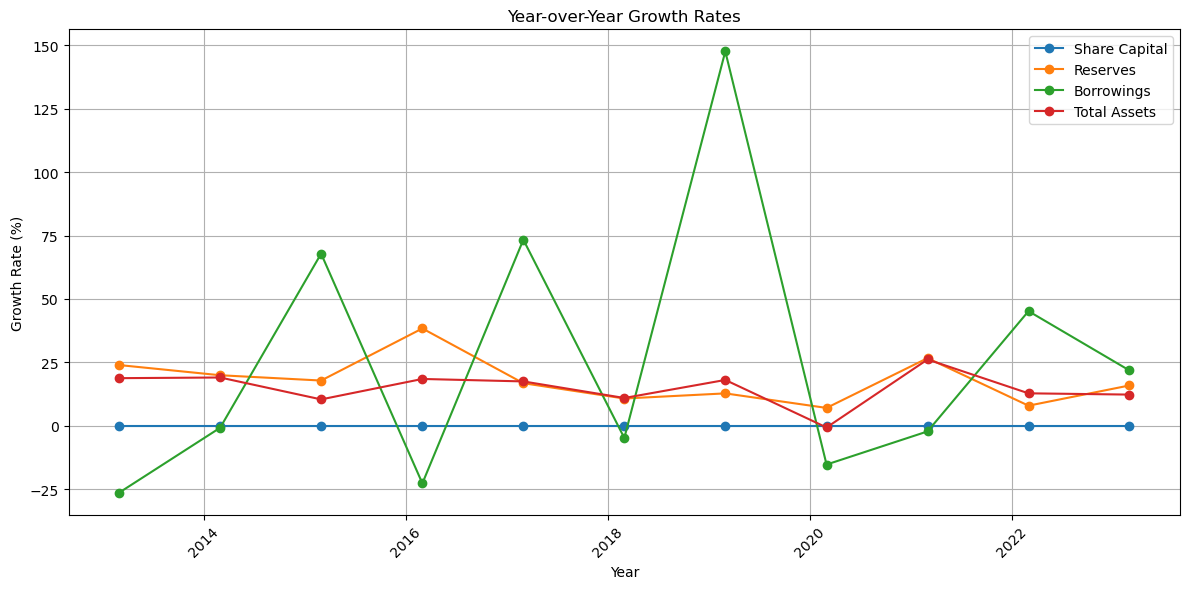

In [149]:

# Calculate year-over-year growth rates for relevant metrics
relevant_metrics = ["Share Capital", "Reserves", "Borrowings", "Total Assets"]

for metric in relevant_metrics:
    df[f"{metric} Growth Rate"] = df[metric].pct_change() * 100

# Plot the growth rates
plt.figure(figsize=(12, 6))
for metric in relevant_metrics:
    plt.plot(df["Year"], df[f"{metric} Growth Rate"], marker='o', label=metric)

plt.title("Year-over-Year Growth Rates")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()








-This shows the percentage change year over year.